# EX16. 흐린사진을 선명하게


최동현님 코드 참고

https://github.com/donghyundavidchoi/AIFFEL/blob/main/Exploration_16_SRGAN.ipynb

## 프로젝트 1_1

### 고해상도 이미지를 불러와 저해상도로 변환하고 SRGAN과 Bicubic 적용

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
import tensorflow as tf
import tensorflow_datasets as tfds
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

print("불러오기 완료!")

불러오기 완료!


## 이미지 불러오기

3686400


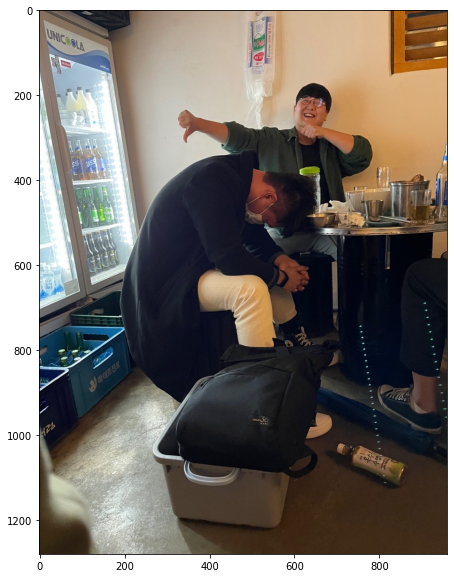

In [3]:
image_path_1 = cv2.imread(os.getenv('HOME')+'/aiffel/super_resolution/goog.JPG') # jpg와 JPG 대문자 구분 필수
hr_image_1 = cv2.cvtColor(image_path_1, cv2.COLOR_BGR2RGB)

print(hr_image_1.size)
plt.figure(figsize=(30,10))
plt.imshow(hr_image_1)

(320, 240, 3)


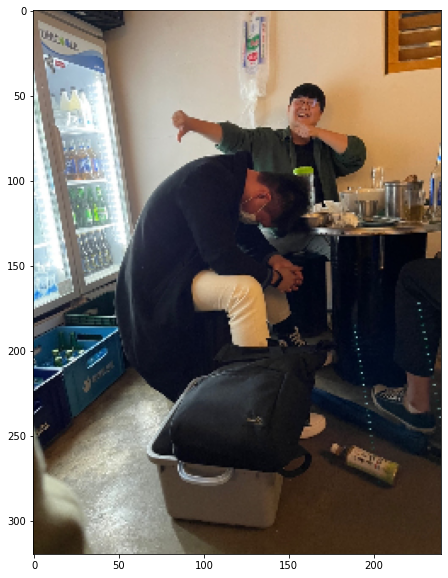

In [4]:
lr_image_1 = cv2.resize(hr_image_1, dsize=(hr_image_1.shape[1]//4, hr_image_1.shape[0]//4))

print(lr_image_1.shape)

plt.figure(figsize=(20,10)) #창의 크기를 가로 세로 20, 10인치로 설정
plt.imshow(lr_image_1)

## SRGAN 모델 불러오기

In [6]:
srgan_path = os.getenv('HOME') + '/aiffel/super_resolution/srgan_G.h5' # 학습이 완료된 Generator 불러오기
srgan = tf.keras.models.load_model(srgan_path)

In [8]:
def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    s = srgan.predict(image)
    s = tf.clip_by_value(s, 0, 255)
    s = tf.round(s)
    s = tf.cast(s, tf.uint8)
    return np.array(s)[0]

## SRGAN 적용

In [9]:
srgan_hr_1 = apply_srgan(lr_image_1)

## Bicubic 적용

In [10]:
bicubic_hr_1 = cv2.resize(lr_image_1, dsize=(hr_image_1.shape[1], hr_image_1.shape[0]), interpolation=cv2.INTER_CUBIC)

## 이미지 비교

/opt/conda/lib/python3.7/site-packages/skimage/metrics/simple_metrics.py:160: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


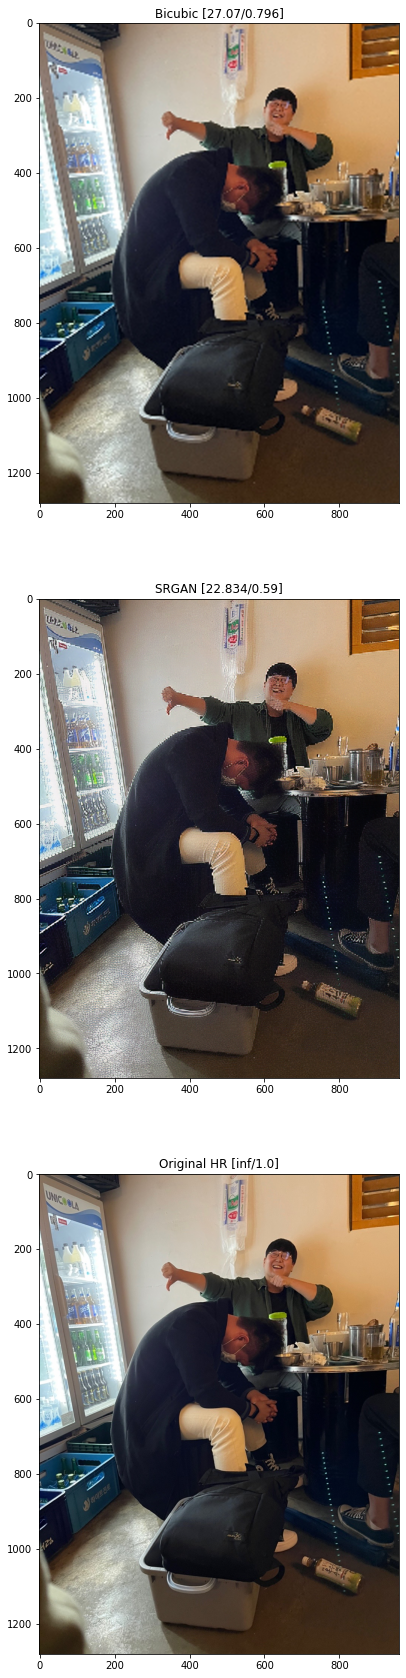

In [11]:
temp = [bicubic_hr_1, srgan_hr_1, hr_image_1]
titles = ["Bicubic", "SRGAN", "Original HR"]

psnr = [round(peak_signal_noise_ratio(hr_image_1, i), 3) for i in temp]
ssim = [round(structural_similarity(hr_image_1, i, multichannel=True), 3) for i in temp]

plt.figure(figsize=(30,30))
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.imshow(temp[i])
    plt.title(titles[i] + f" [{psnr[i]}/{ssim[i]}]", fontsize=12)

In [12]:
def crop(image, left_top, x=50, y=100):
    return image[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]

## Crop 이미지 비교
### 눈으로 잘 안보이니 확대해서 봅시다

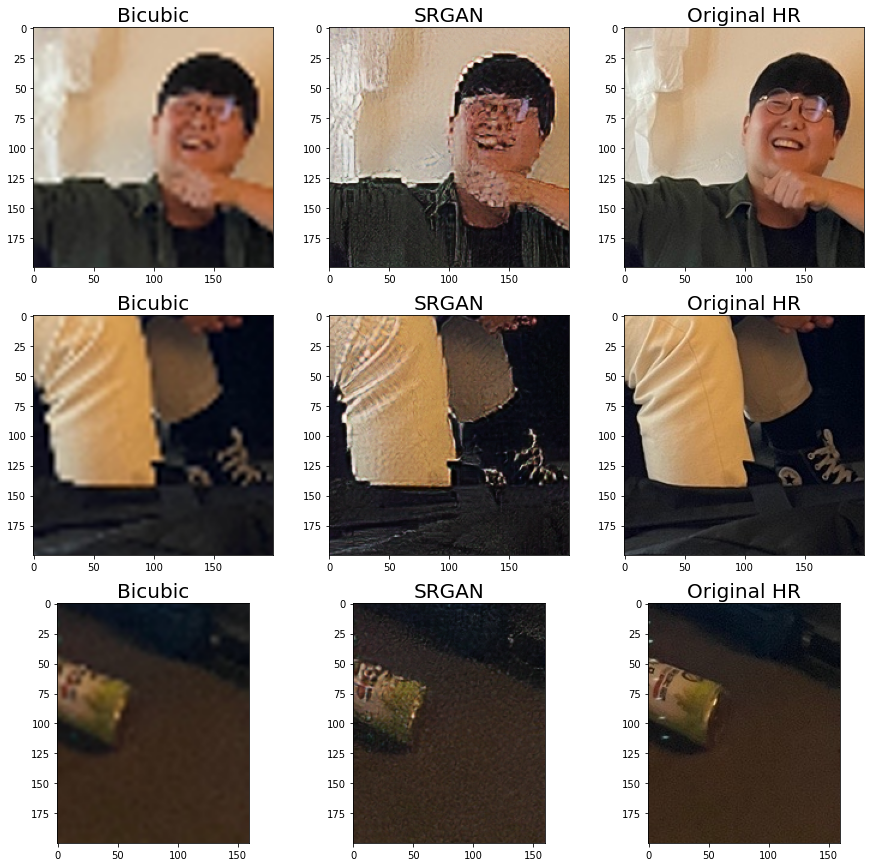

In [17]:
left_tops = [(150,500),(650,450),(1000, 800)] # 좌측 상단의 시작점의 위치를 표시 (행,열)

temp = []
for left_top in left_tops:
    temp1 = crop(bicubic_hr_1, left_top, 200, 200)
    temp2 = crop(srgan_hr_1 , left_top, 200, 200)
    temp3 = crop(hr_image_1, left_top, 200, 200)
    temp.extend([temp1, temp2, temp3])
    
labels = ["Bicubic", "SRGAN", "Original HR"] * 3

plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(temp[i])
    plt.title(labels[i], fontsize=20)

## 프로젝트 1_2

### 저해상도 이미지를 불러와 SRGAN과 Bicubic 적용

## 이미지 불러오기

1504800


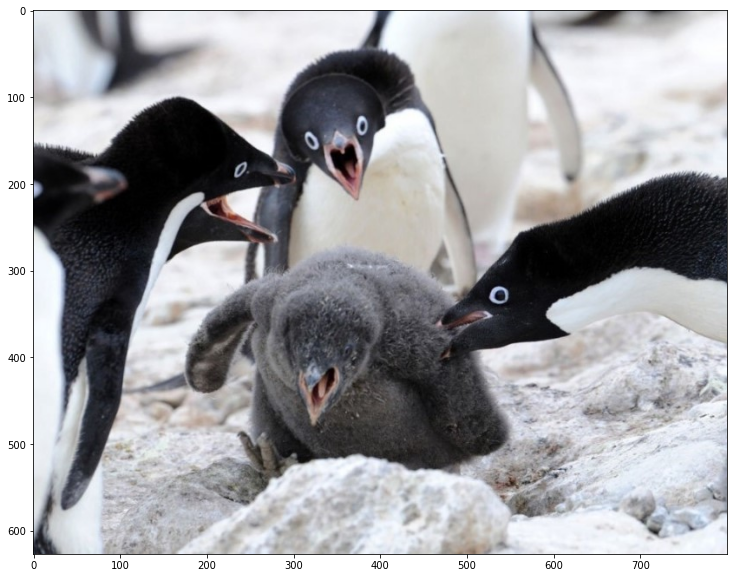

In [18]:
image_path_2 = cv2.imread(os.getenv('HOME')+'/aiffel/super_resolution/penguin.JPEG')
lr_image_2 = cv2.cvtColor(image_path_2, cv2.COLOR_BGR2RGB)

print(lr_image_2.size)
plt.figure(figsize=(30,10))
plt.imshow(lr_image_2)

## SRGAN 를 적용해 볼까요?

In [19]:
srgan_hr_2 = apply_srgan(lr_image_2)

## Bicubic 를 적용해 볼까요?

In [20]:
bicubic_hr_2 = cv2.resize(lr_image_2, dsize=(lr_image_2.shape[1]*4, lr_image_2.shape[0]*4), interpolation=cv2.INTER_CUBIC)

## 두 이미지를 비교해 볼까요?

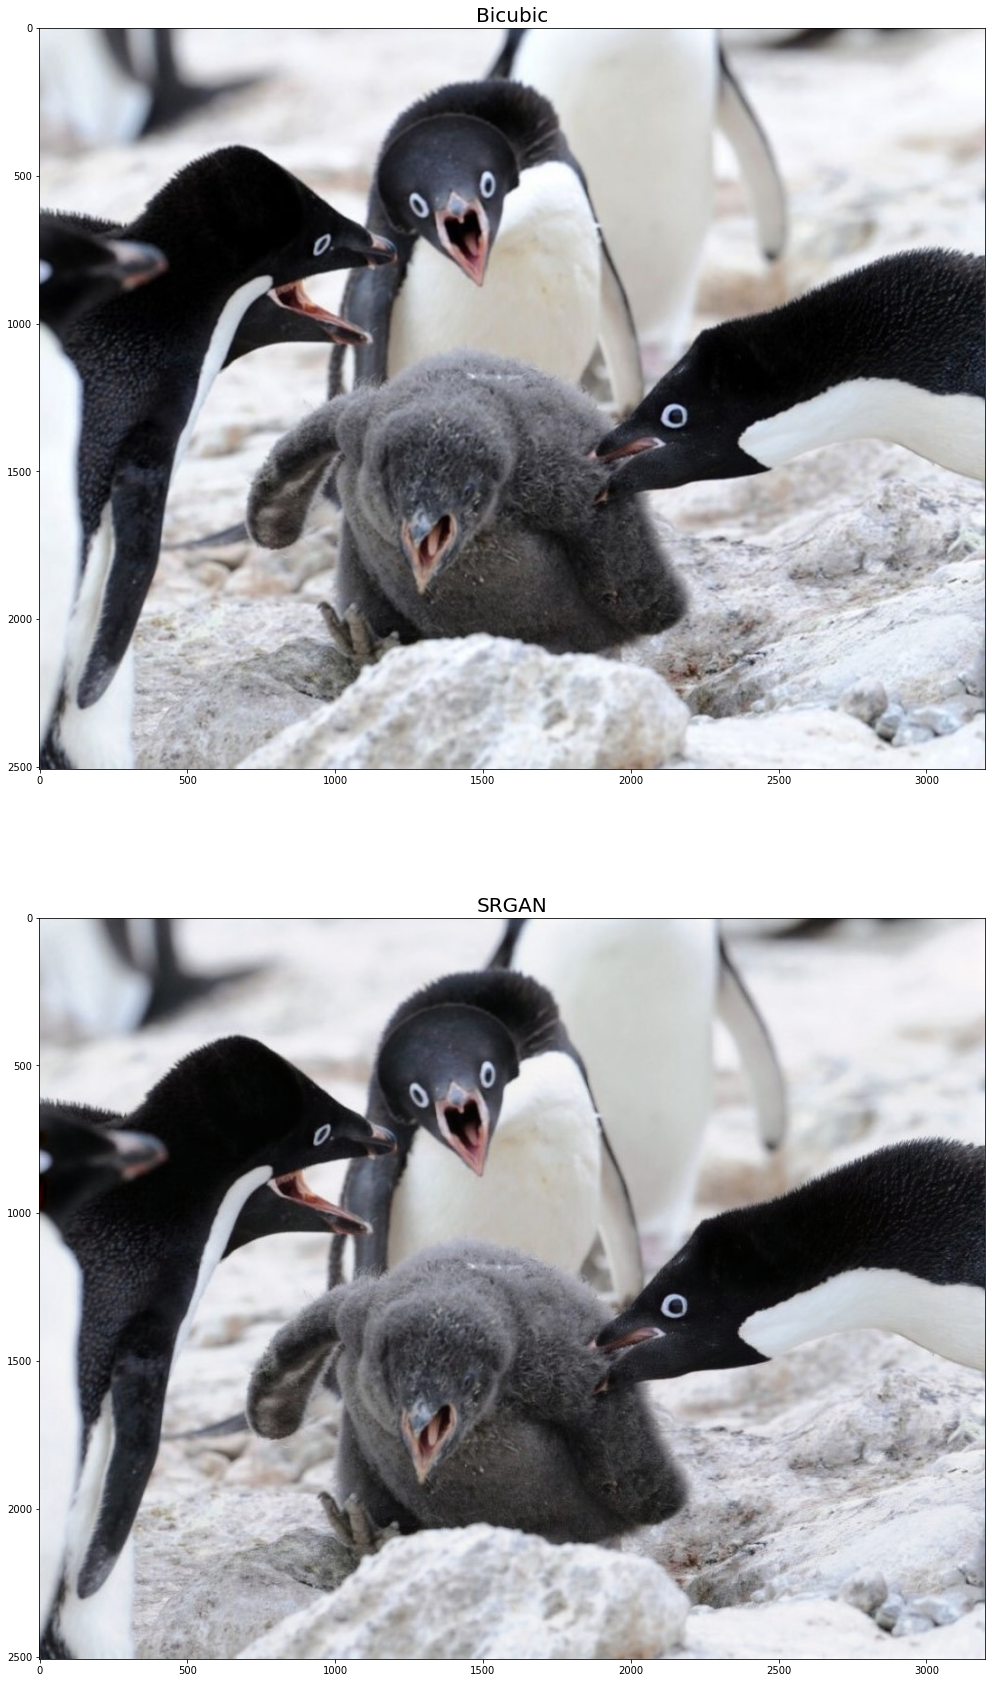

In [21]:
temp = [bicubic_hr_2, srgan_hr_2]
titles = ["Bicubic", "SRGAN"]

plt.figure(figsize=(30,30))
for i in range(2):
    plt.subplot(2,1,i+1)
    plt.imshow(temp[i])
    plt.title(titles[i], fontsize=20)

## 두 이미지를 잘라서(Crop) 비교해볼까요?

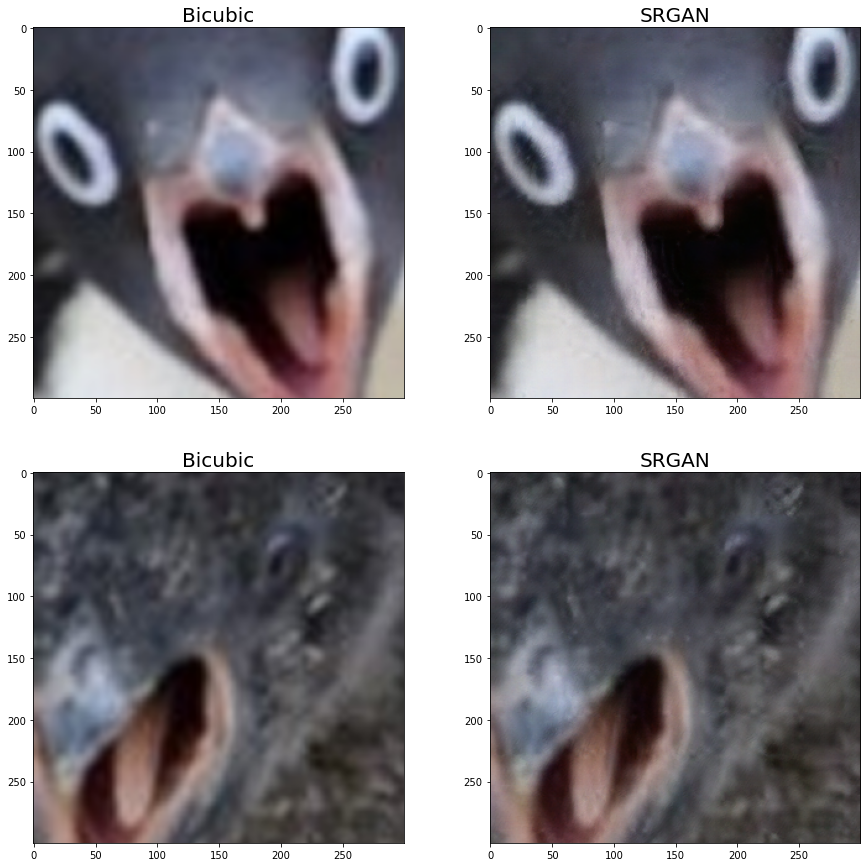

In [31]:
left_tops = [(500,1250),(1500,1250)]

temp = []
for left_top in left_tops:
    temp1 = crop(bicubic_hr_2, left_top, 300, 300)
    temp2 = crop(srgan_hr_2 , left_top, 300, 300)
    temp.extend([temp1, temp2])
    
labels = ["Bicubic", "SRGAN"] * 2

plt.figure(figsize=(15,15))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(temp[i])
    plt.title(labels[i], fontsize=20)

1. 현재 흔들린 이미지가 없어서 노이즈가 많이 껴있는 이미지를 넣었다.(국밥님.JPG)
    1. Bicubic과 SRGAN의 차이를 잘 모르겠다.
2. 심심풀이로 펭귄 이미지를 넣었다(펭귄.JPEG)
    1. Bicubic과 SRGAN의 차이를 보려고 하니 흐린 이미지는 똑같고 SRGAN이 화면에 노이즈가 더 있는것을 알 수 있다.

아직까지 테스트중인 데이터들이라
실질적으로 다른 이미지를 가져와서 테스트 해봐야겠다.

- 다른 이미지 넣어서 테스트해보기
- HEIC 파일도 읽어지는지 테스트해보기